<a href="https://colab.research.google.com/github/EnriqueAza/Actividades/blob/main/AF6_ArboldeDecision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad 6


Enrique Azael Páez Estrada, Ashley Vanessa Cavasos Garza, Stephanie Marianne Castillo Mar, Jessica Marlene Aleman Amezcua

In [1]:
# Importación de librerias necesarias
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Cargar el conjunto de datos de cáncer de mama
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
# División de los datos: 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
# Crear y entrenar el modelo de árbol de decisión
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [5]:
# Realizar 3 predicciones individuales con el conjunto de prueba
print("Predicciones individuales:")
for i in range(3):
    pred = modelo_arbol.predict([X_test[i]])
    print(f"Instancia {i+1}: Predicción = {data.target_names[pred[0]]}, Real = {data.target_names[y_test[i]]}")

Predicciones individuales:
Instancia 1: Predicción = benign, Real = benign
Instancia 2: Predicción = malignant, Real = malignant
Instancia 3: Predicción = malignant, Real = malignant


In [6]:
# Predicciones para todo el conjunto de prueba
y_pred = modelo_arbol.predict(X_test)

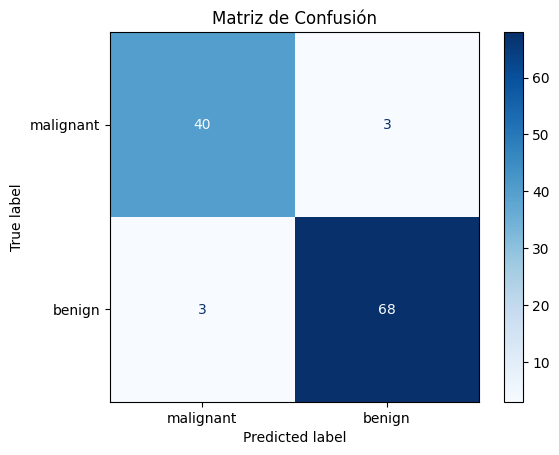

In [7]:
# Matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

In [8]:
# Cálculo de precisión
precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {precision:.2f}")

Precisión del modelo: 0.95


In [9]:
# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

Reporte de clasificación:
              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



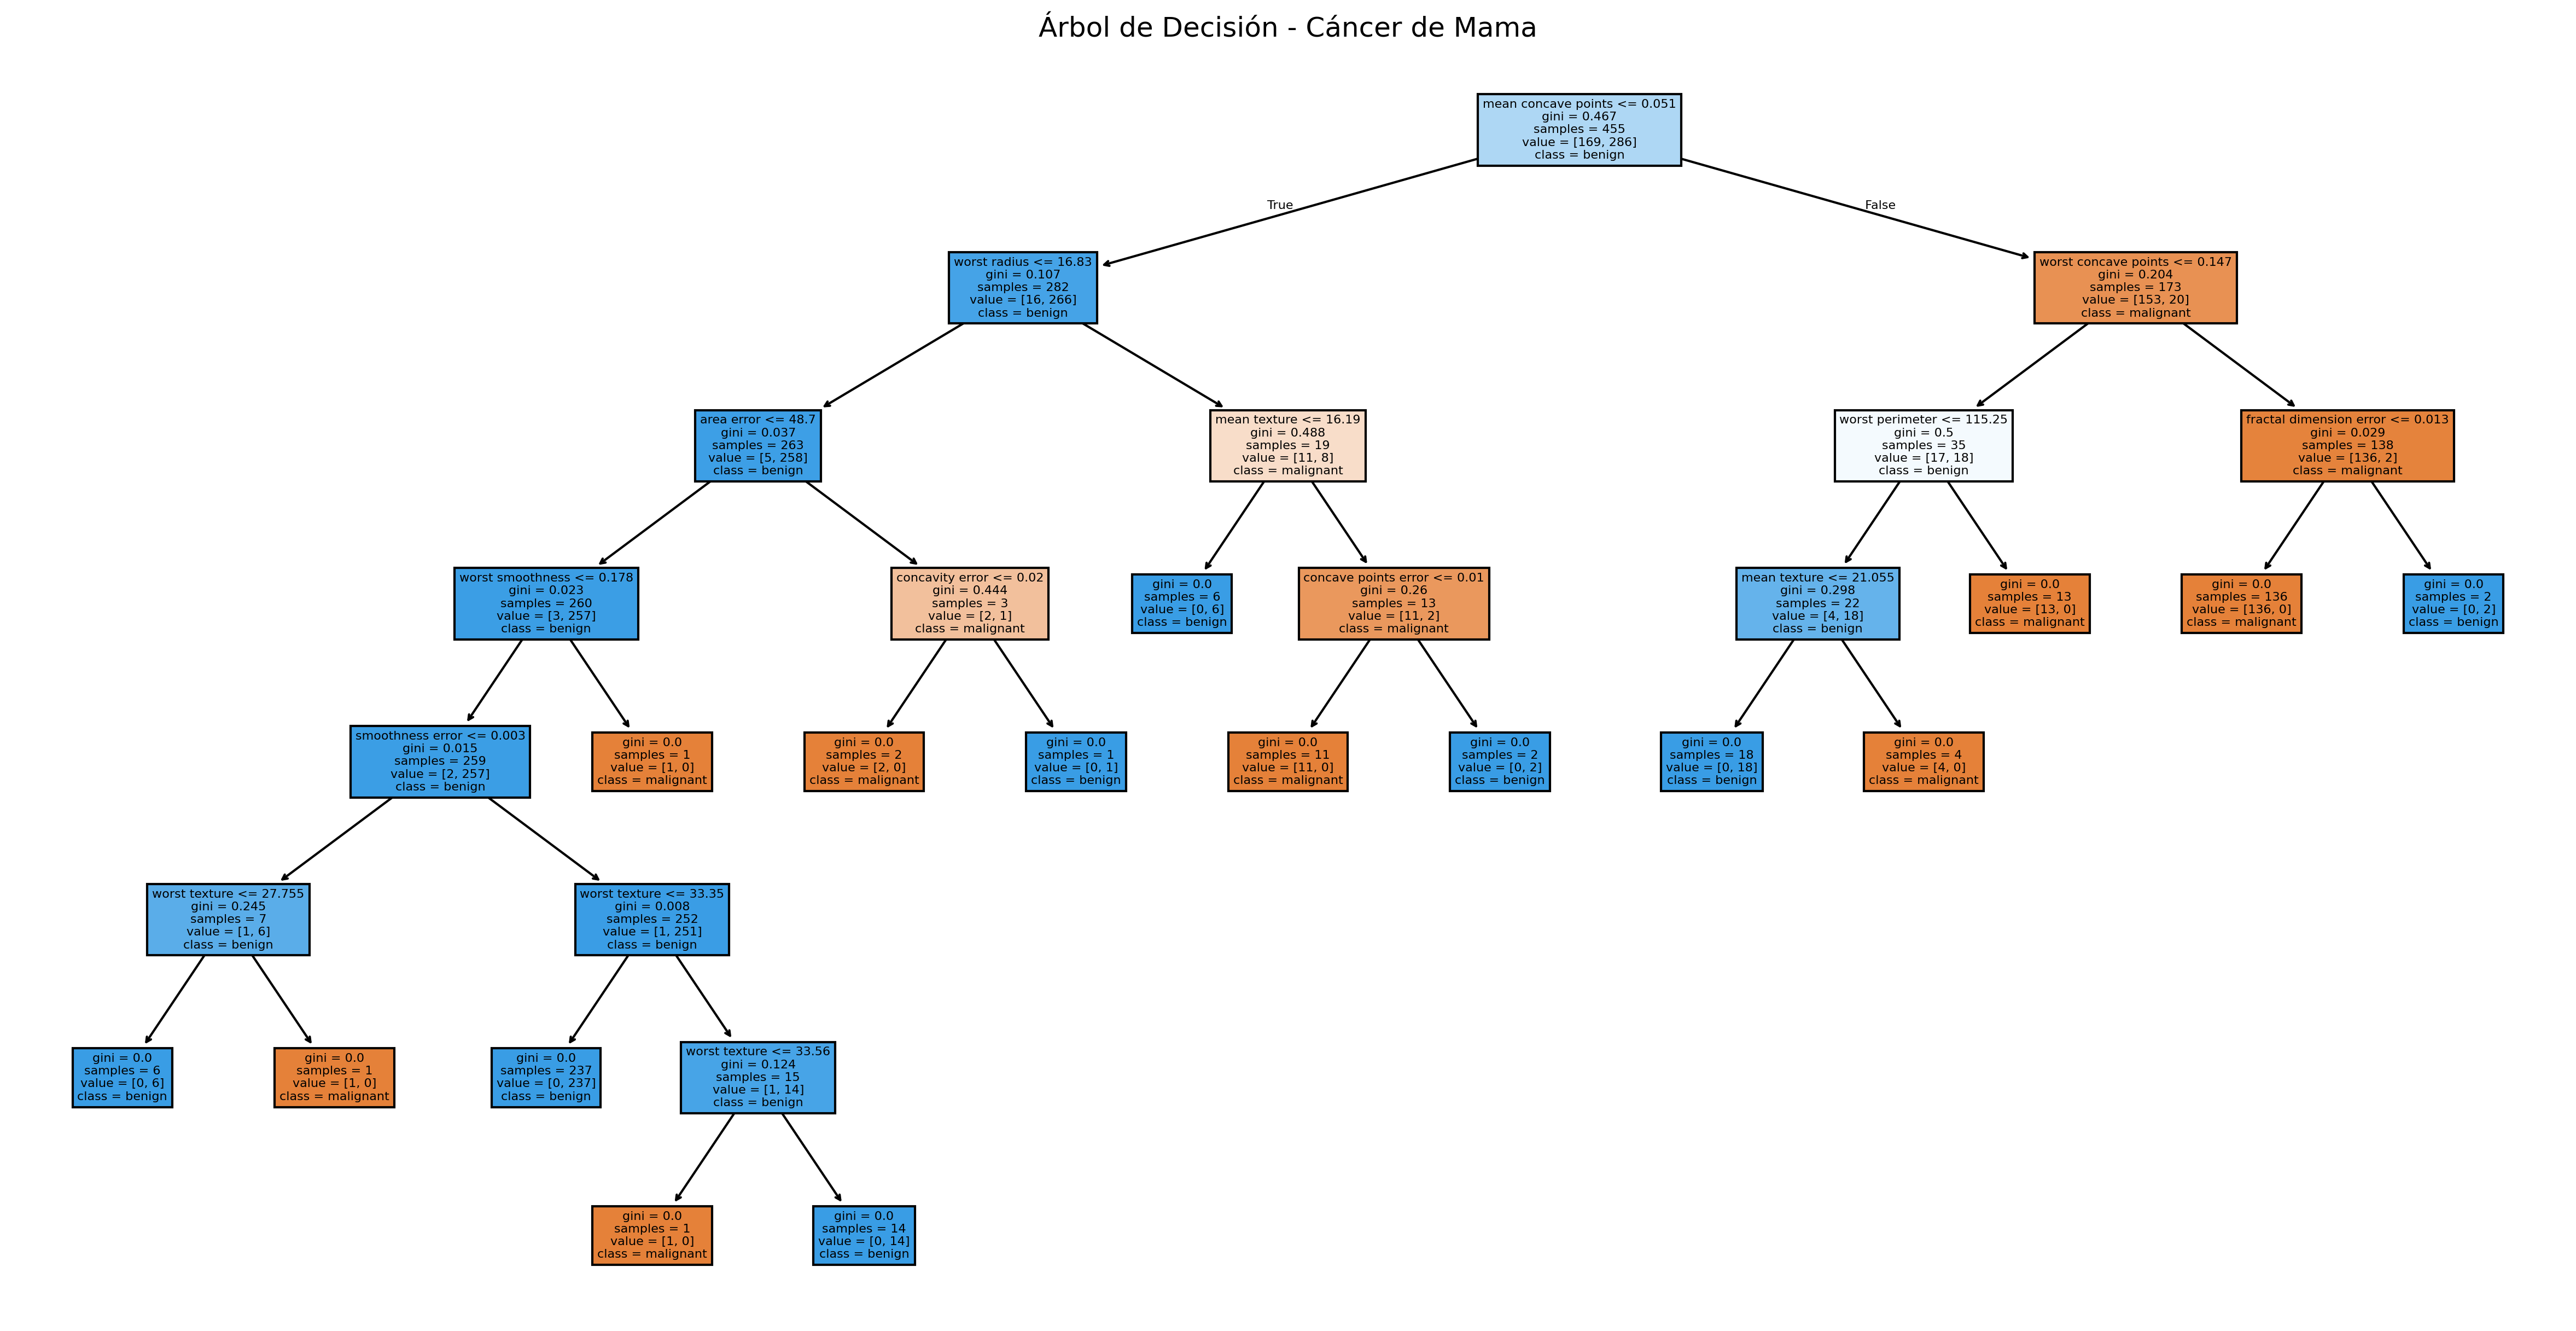

In [10]:
# Visualización del árbol de decisión
plt.figure(figsize=(20, 10), dpi=300)
plot_tree(modelo_arbol, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Árbol de Decisión - Cáncer de Mama")
plt.show()